## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 5</center></h1>
### <h1><center>Important NOTE: n order to get full credit, for every question, you need to provide the details of your work on how to get to a solution or the end of a proof.</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Cole Nockolds</center></h1>
##### <h1><center>Due day: 11:00 pm, Tuesday, 19 November </center></h1>
#### <h1><center>All solutions must be in one pdf file except codes.</center><h1>

$\newcommand{\LRp}[1]{\left( #1 \right)}$ 
$\newcommand{\LRs}[1]{\left[ #1 \right]}$ 
$\newcommand{\LRa}[1]{\left< #1 \right>}$ 
$\newcommand{\LRc}[1]{\left\{ #1 \right\}}$ 
$\newcommand{\prob}[1]{P\LRs{#1}}$
$\newcommand{\Dis}[2]{\mathcal{N}\LRp{#1, #2}}$
$\newcommand{\t}{\theta}$
$\newcommand{\d}{\mathcal{D}}$
$\newcommand{\s}{\mathcal{S}}$
$\newcommand{\yi}{y^{(i)}}$
$\newcommand{\xid}{x^{(i)}}$
$\newcommand{\grad}[2]{\nabla_{#1}\LRp{#2}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$ 
$\newcommand{\x}{\boldsymbol{x}}$ 
$\newcommand{\y}{\boldsymbol{x}}$ 

## Question 1: (30) (Lecture 11: Kernel SVM with scikit-learn)
Based on the given code below, generate a new training set of 20 samples. Using scikit-learn, plot the decision boundaries for the binary classification of the data with the following approaches:

1. Polynomial kernel (use the entire dataset): You will need to produce six plots for the six unique pairs of degree and $\gamma$ ($\gamma$ is an input to the scikit-learn funtion):
 - Degree = 2, 5.
 - $\gamma = 1, 2, 5$.
Discuss the significance of $\gamma$.
2. Radial basic kernel: $$K(\boldsymbol{x},\boldsymbol{z}) = \exp \left(-\frac{||\boldsymbol{x} - \boldsymbol{z}||^2}{2\sigma^2}\right).$$ You will need to produce six plots for the six unique pairs of $\sigma$ and number of samples:
 - $\sigma = 0.2, 1.0 ,2.0$
 - Training data = 10 samples, 20 samples.


'YOU NEED TO GENERATE THE NEW DATA SET (in the way you want!)'

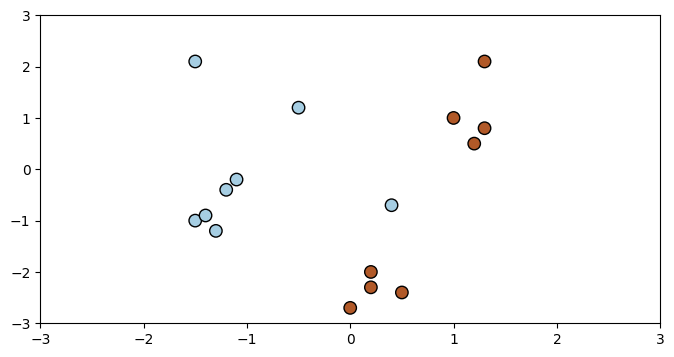

In [160]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Our dataset and targets
X = np.c_[(.4, -.7), (-1.5, -1), (-1.4, -.9), (-1.3, -1.2), (-1.1, -.2), (-1.2, -.4), (-.5, 1.2), (-1.5, 2.1), (1, 1),
          (1.3, .8), (1.2, .5), (.2, -2), (.5, -2.4), (.2, -2.3), (0, -2.7), (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

x_min, x_max = -3, 3
y_min, y_max = -3, 3
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k', s=80)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

'YOU NEED TO GENERATE THE NEW DATA SET (in the way you want!)'


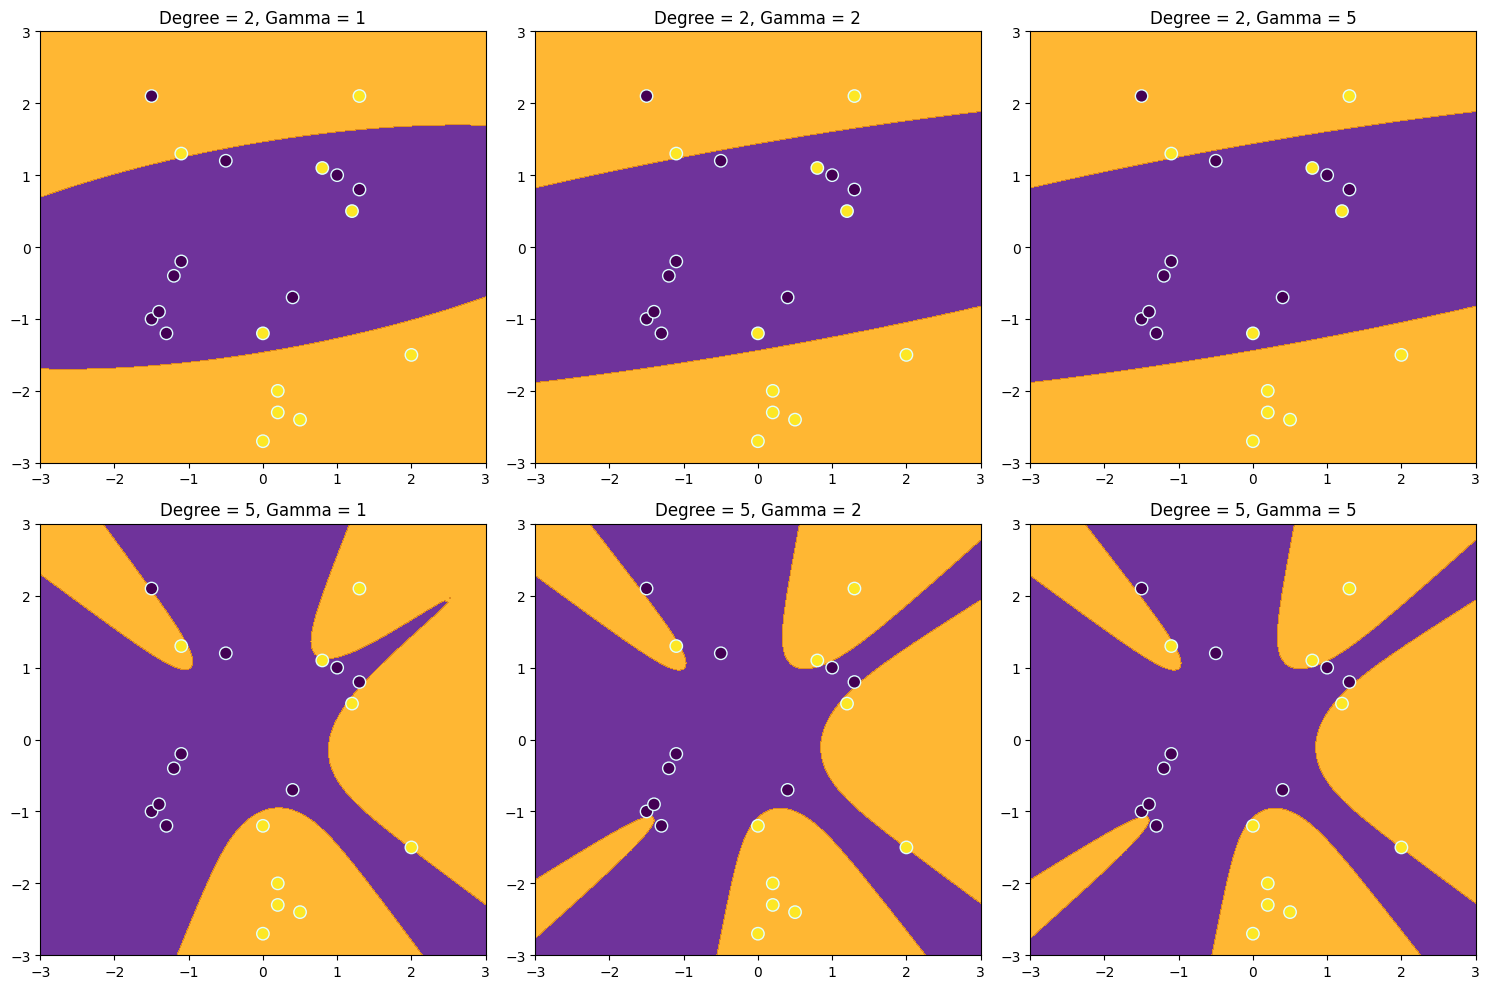

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the dataset with 20 specific points for X (2 features, 20 samples)
X = np.c_[(.4, -.7), (-1.5, -1), (-1.4, -.9), (-1.3, -1.2), (-1.1, -.2), (-1.2, -.4), 
          (-.5, 1.2), (-1.5, 2.1), (1, 1), (1.3, .8), (1.2, .5), (.2, -2), (.5, -2.4), 
          (.2, -2.3), (0, -2.7), (1.3, 2.1), (2, -1.5), (0.8, 1.1), (-1.1, 1.3), (0, -1.2)].T  # Shape (20, 2), 20 samples with 2 features

# Assign labels: 0 for points in the left region and 1 for points in the right region
Y = [0] * 10 + [1] * 10  # The first 10 points are labeled 0, the next 10 are labeled 1

# Create a mesh grid for plotting decision boundaries
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Set up the plots
degrees = [2, 5]
gammas = [1, 2, 5]

plt.figure(figsize=(15, 10))
plot_idx = 1

# Iterate through each combination of degree and gamma
for degree in degrees:
    for gamma in gammas:
        # Train SVM with polynomial kernel
        clf = svm.SVC(kernel="poly", degree=degree, gamma=gamma)
        clf.fit(X, Y)  # Fit the model to the training data (X shape is now (20, 2))

        # Predict on the mesh grid
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        plt.subplot(len(degrees), len(gammas), plot_idx)
        plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=.8, colors = ['indigo', 'orange'])
        
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="lightcyan", s=80, zorder=1)
        plt.title(f"Degree = {degree}, Gamma = {gamma}")
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plot_idx += 1

plt.tight_layout()
plt.show()


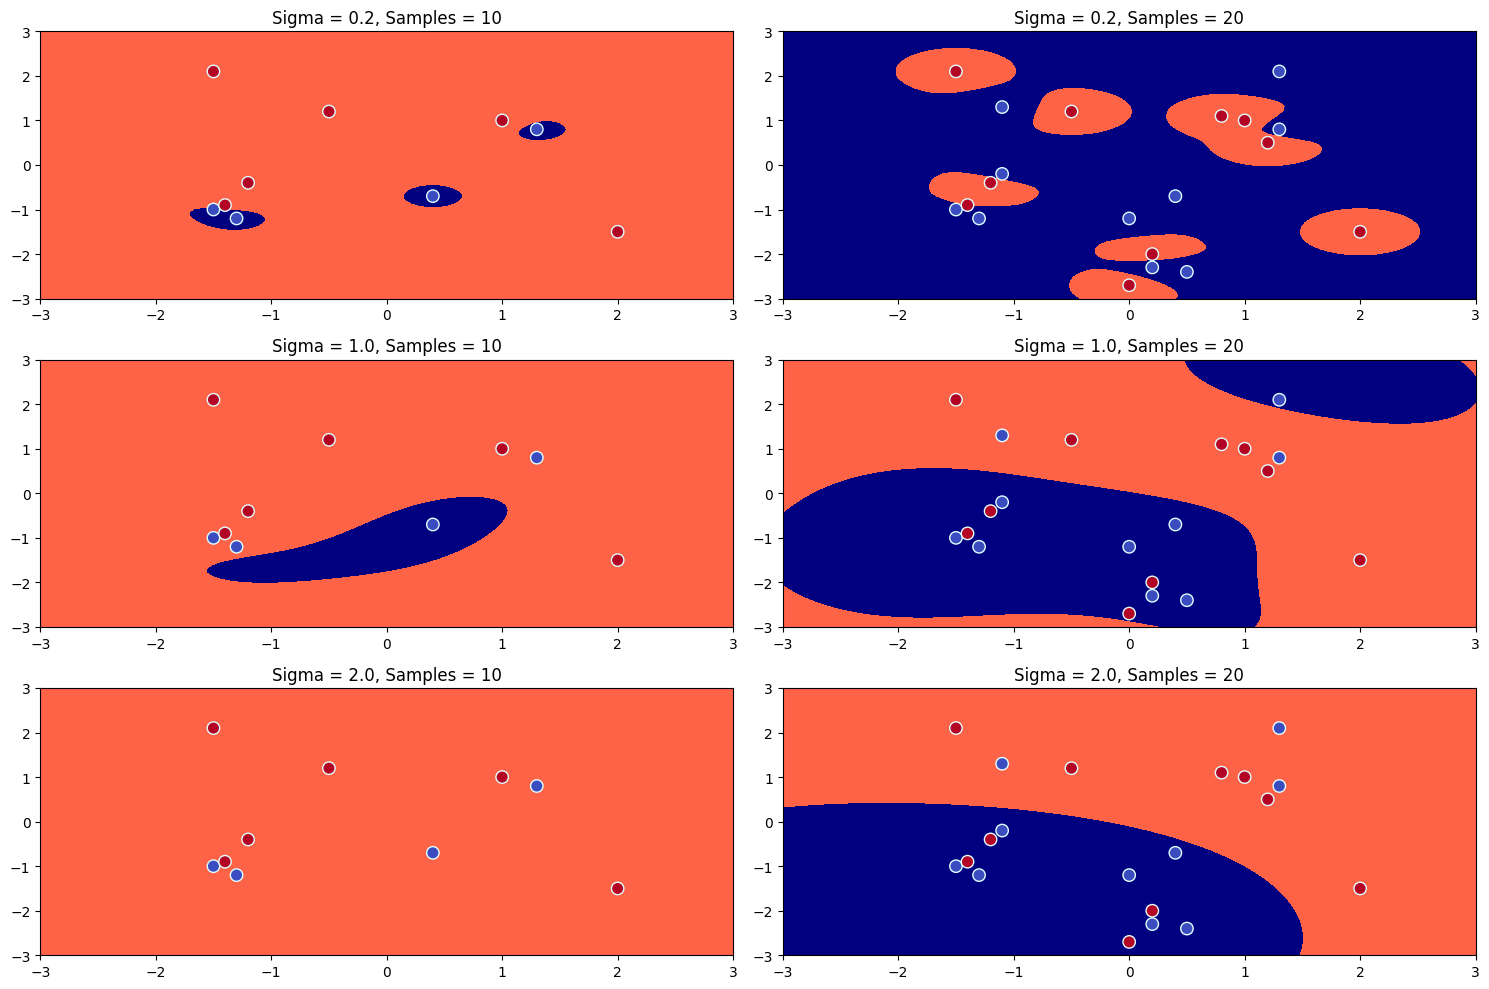

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X_20 = np.array(X)

Y_20 = [0] * 10 + [1] * 10  # The first 10 points are labeled 0, the next 10 are labeled 1

# Shuffle the data
indices = np.random.permutation(X_20.shape[0])  # Create a random permutation of indices
X_20 = X_20[indices, :]  # Shuffle X_20 based on the indices
Y_20 = np.array(Y_20)[indices]  # Shuffle Y_20 based on the same indices

# Define parameters for RBF kernel and plotting
sigmas = [0.2, 1.0, 2.0]
sample_sizes = [10, 20]
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Set up the plots
plt.figure(figsize=(15, 10))
plot_idx = 1

for sigma in sigmas:
    for sample_size in sample_sizes:  
        # Select the appropriate data
        X = X_20[:sample_size]  # Get first 'sample_size' samples
        Y = Y_20[:sample_size]  # Get corresponding labels
        
        # Calculate gamma from sigma
        gamma = 1 / (2 * sigma**2)
        
        # Train SVM with RBF kernel
        clf = svm.SVC(kernel="rbf", gamma=gamma)
        clf.fit(X, Y)  # Fit the model to the training data (now X has shape (sample_size, 2))

        # Predict on the mesh grid
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Define contour levels dynamically and sort them
        levels = [Z.min(), 0, Z.max()]
        levels = sorted(levels)  # Ensure the levels are increasing
        
        # Plot the decision boundary
        plt.subplot(3, 2, plot_idx)  # 3x3 grid to accommodate 9 plots
        plt.contourf(xx, yy, Z, levels=levels, alpha=1, colors=['navy', 'tomato'])  # Custom colors for regions
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors="lightcyan", s=80, zorder=1)  # Correct scatter
        plt.title(f"Sigma = {sigma}, Samples = {sample_size}")
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plot_idx += 1

plt.tight_layout()
plt.show()


## Question 2: (20) (Kernel with Linear Regression problem)
Given the model:

$$y = \boldsymbol{\theta}^T \boldsymbol{\phi}(x) + \epsilon.$$

1. Derive the following kernel form (including the form/equation for $\beta_i$) for the Ridge Regression approach.
    
    $$y_{\text{test}} = \boldsymbol{\phi}(x_{\text{test}})^\top \boldsymbol{\theta} = \sum_{i=1}^n \beta_i \boldsymbol{\phi}(x_{\text{test}})^\top \boldsymbol{\phi}(x^{(i)}),$$

2. Starting from the given code below, write a short code using the derived kernel form, from part 1, with a polynomial kernel function (degree = 4). Plot the predicted function together with the true function and discuss the results. 

3. Now, with the same derived kernel formula, change the kernel function to the Gaussian basis function:
    
    $${\phi}_j(x) = \exp \left(-\frac{(x-u_j)^2}{2 \sigma^2}\right), \quad j = 0,...,10$$

    Find the regression solution for the following case: $u_j = \left[0, 0.1, 0.2, ...,1\right]$ and s = 1. Plot the predicted function together with the true function and discuss the results.


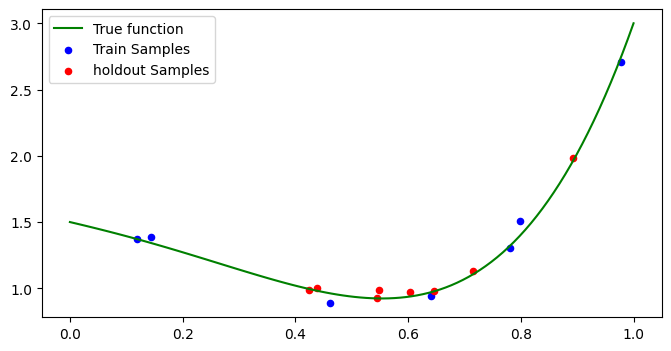

In [43]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
import pandas as pd
from sklearn import datasets
np.random.seed(0)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression

order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])
def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f
# Test samples
n_holdout_samples = 8
X_holdout = np.sort(np.random.rand(n_holdout_samples))
Y_holdout = true_fn(X_holdout) + np.random.randn(n_holdout_samples) * 0.05 * true_fn(X_holdout)
# Training samples
n_samples = 7
X = np.sort(np.random.rand(n_samples))
Y = true_fn(X) + np.random.randn(n_samples) * 0.05 * true_fn(X)
X_test = np.linspace(0., 1., 100)
plt.plot(X_test,true_fn(X_test),'g',label = 'True function')
plt.scatter(X,Y, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.scatter(X_holdout,Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="holdout Samples")
plt.legend()

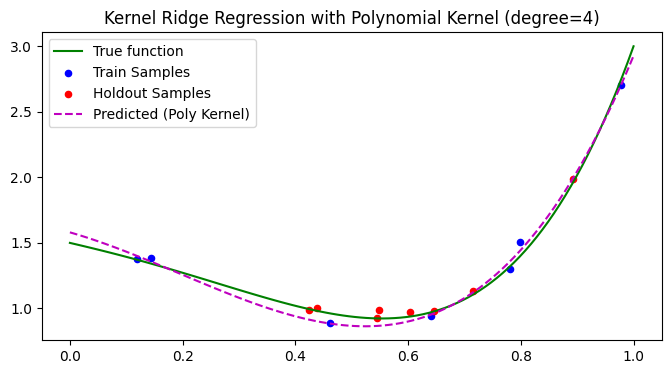

In [44]:
from numpy.linalg import inv
# Polynomial Kernel function
def polynomial_kernel(x, y, degree=4):
    return (1 + np.outer(x, y)) ** degree

# Ridge regression solution using kernel form
def kernel_ridge_regression(X, Y, X_test, kernel, lambda_reg=0.0001):
    # Compute the kernel matrix
    K = kernel(X, X)
    # Solve for beta coefficients 
    n = K.shape[0]
    beta = inv(K + lambda_reg * np.eye(n)).dot(Y)
    # Compute predictions
    K_test = kernel(X_test, X)
    y_pred = K_test.dot(beta)
    return y_pred

# Ridge Regression using kernel
y_pred_poly = kernel_ridge_regression(X, Y, X_test, kernel=polynomial_kernel)

# Plot the true function, training data, and predictions
plt.plot(X_test, true_fn(X_test), 'g', label='True function')
plt.scatter(X, Y, edgecolor='b', s=20, facecolor='b', label="Train Samples")
plt.scatter(X_holdout, Y_holdout, edgecolor='r', facecolor='r', s=20, label="Holdout Samples")
plt.plot(X_test, y_pred_poly, 'm--', label="Predicted (Poly Kernel)")
plt.legend()
plt.title("Kernel Ridge Regression with Polynomial Kernel (degree=4)")
plt.show()

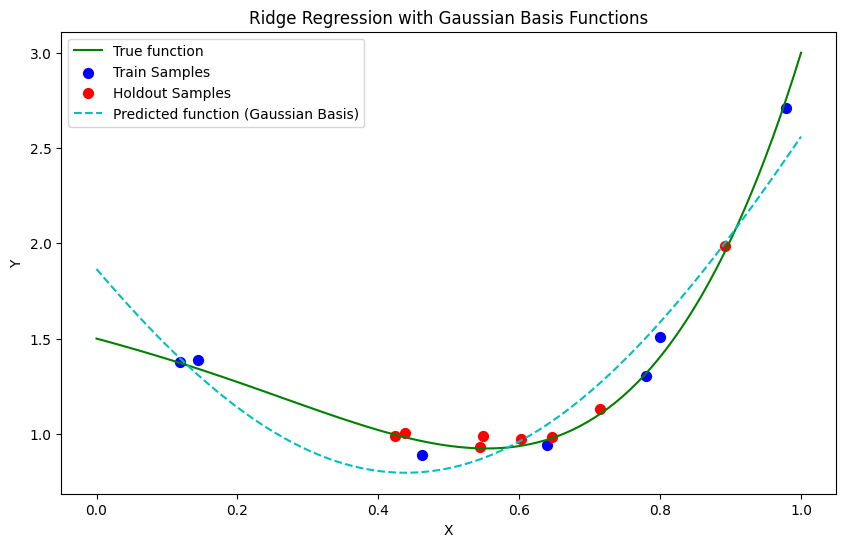

In [45]:

# Parameters
centers = np.linspace(0, 1, 11)  # Centers from 0 to 1, spaced by 0.1
sigma = 1  # Width of the Gaussian basis functions
lambda_reg = 0.0001  # Regularization strength for Ridge regression


# Gaussian basis function feature map
def gaussian_feature_map(X, centers, sigma):
    features = np.exp(-0.5 * ((X[:, None] - centers) ** 2) / sigma ** 2)
    return features

# Create the feature matrices for training and testing
Phi_train = gaussian_feature_map(X, centers, sigma)
Phi_test = gaussian_feature_map(X_test, centers, sigma)

# Ridge regression solution
beta = inv(Phi_train.T @ Phi_train + lambda_reg * np.eye(Phi_train.shape[1])) @ Phi_train.T @ Y
y_pred = Phi_test @ beta

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X_test, true_fn(X_test), 'g', label='True function')
plt.scatter(X, Y, edgecolor='b', s=50, facecolor='b', label="Train Samples")
plt.scatter(X_holdout, Y_holdout, edgecolor='r', facecolor='r', s=50, color='r', label="Holdout Samples")
plt.plot(X_test, y_pred, 'c--', label="Predicted function (Gaussian Basis)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Ridge Regression with Gaussian Basis Functions")
plt.show()


## Question 3: (10) (Kernel basis)

Let $\boldsymbol{x},\boldsymbol{z} \in \mathbb{R}^n$, show that the Radial Basis Function (RBF; sometimes called Gaussian) kernel,

$$K(\boldsymbol{x},\boldsymbol{z}) = \exp \left(-\frac{||\boldsymbol{x} - \boldsymbol{z}||_2^2}{2\sigma^2}\right),$$

 is a  Mercer kernel, where $||\cdot||_2$ denotes $\ell_2$-norm (Euclidean norm) in $\mathbb{R}^n$.